/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


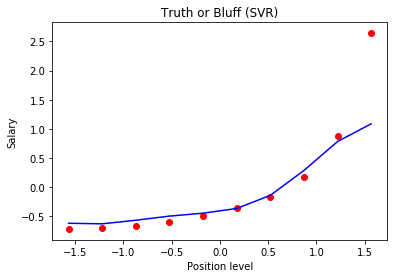

In [21]:
#SVR
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')
x = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

# Splitting the dataset into the Training set and Test set
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = y.reshape(-1,1)
y = sc_y.fit_transform(y)


# Fitting the Regression Model to the dataset
#rbf makes our svr model non linear
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x,y)

# Predicting a new result
#changes are made to suit feature scaling
y_pred = sc_y.inverse_transform(regressor.predict(sc_x.transform(np.array([[6.5]]))))
#for original scale of salary, we apply inverse on scalar object


# Visualising the SVR results
plt.scatter(x, y, color = 'red')
plt.plot(x, regressor.predict(x), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


In [23]:
y_pred

array([ 170370.0204065])

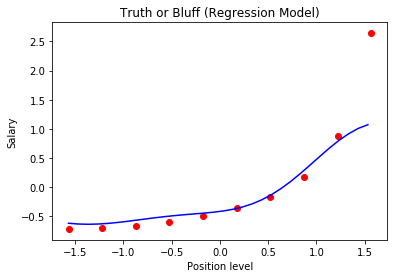

In [25]:
# Visualising the Regression results (for higher resolution and smoother curve)
x_grid = np.arange(min(x), max(x), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(x, y, color = 'red')
plt.plot(x_grid, regressor.predict(x_grid), color = 'blue')
plt.title('Truth or Bluff (Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000
